In [1]:
# Install the Roboflow Python package to interact with the Roboflow API
!pip install roboflow

# Import the Roboflow class to work with projects hosted on Roboflow
from roboflow import Roboflow

# Initialize a Roboflow object with your API key to authenticate access to your account
rf = Roboflow(api_key="9tM60PjNko69BHRZdXPv")

# Connect to a specific project within the workspace by providing the workspace name and project ID
project = rf.workspace("project-uywm9").project("yello-peach-disease-goh8y")

# Access a specific version of the project (version 2 in this case) to download the dataset
version = project.version(2)

# Download the dataset in YOLOv8 format for training object detection models
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Yello-peach-disease-减类-2 in yolov8:: 100%|██████████| 2970/2970 [00:00<00:00, 6084.45it/s]


In [4]:
import os
import shutil

def move_images_to_class_folders(image_dir, labels_dir, class_names):
    """
    Moves images to their respective class folders based on label files.

    Args:
        image_dir (str): Directory containing image files.
        labels_dir (str): Directory containing label files.
        class_names (list): List of class names corresponding to indices in label files.
    """
    # Iterate through each label file in the labels directory
    for label_file in os.listdir(labels_dir):
        # Construct the full path to the label file
        label_path = os.path.join(labels_dir, label_file)

        # Ensure label file is not empty
        with open(label_path, 'r') as lf:
            lines = lf.readlines()

        if len(lines) == 0:
            print(f"Skipping empty label file: {label_file}")
            continue  # Skip processing if the label file is empty

        # Get the class index from the first line (assumed YOLO format)
        class_idx = int(lines[0].split()[0])
        class_name = class_names[class_idx]

        # Find the corresponding image file (assuming images are .jpg format)
        image_file = label_file.replace('.txt', '.jpg')
        image_path = os.path.join(image_dir, image_file)

        # Check if the image exists and move it to the corresponding class folder
        if os.path.exists(image_path):
            # Construct the destination path for the image file
            dest_dir = f'/content/classification/{class_name}'
            # Create the class folder if it doesn't exist
            os.makedirs(dest_dir, exist_ok=True)
            # Copy the image file to the class folder
            shutil.copy(image_path, dest_dir)
        else:
            print(f"Image not found for label: {label_file}")

# Move train and validation images to their respective class folders
move_images_to_class_folders(train_path, train_path.replace('/images', '/labels'), class_names)
move_images_to_class_folders(val_path, val_path.replace('/images', '/labels'), class_names)

print("Images have been copied to respective class folders.")


Skipping empty label file: 001355_jpg.rf.671ef9384a68c2fe0c85029b820d064d.txt
Skipping empty label file: 001505_jpg.rf.2f378ed2325839317884fc7945c90516.txt
Skipping empty label file: 000443_jpg.rf.f910eee79024733d830ab983ee5b6071.txt
Skipping empty label file: 000448_jpg.rf.e0385b9dc34ef18599a427d8a2e77fc5.txt
Skipping empty label file: 001250_jpg.rf.28f7e7541052e6c48382e0ef1ae6dfdf.txt
Images have been copied to respective class folders.


In [6]:
import os

# Function to count images in each class folder and the total
def count_images_in_class_folders(base_path, class_names):
    """
    Counts the number of images in each class folder and the total number of images.

    Args:
        base_path (str): Base directory containing class folders.
        class_names (list): List of class names representing folder names.
    """
    total_images = 0  # Initialize total image count

    # Iterate over each class name to count images
    for class_name in class_names:
        # Construct the path to the class folder
        class_folder = os.path.join(base_path, class_name)

        # Ensure the class folder exists before attempting to list files
        if os.path.exists(class_folder):
            # Count the number of files (images) in the class folder
            num_images = len(os.listdir(class_folder))
            print(f"Class '{class_name}' has {num_images} images.")
            total_images += num_images  # Add to total image count
        else:
            print(f"Class folder '{class_name}' does not exist.")

    # Print the total number of images across all class folders
    print(f"\nTotal number of images in all class folders: {total_images}")

# Path to the classification folder
classification_folder = '/content/classification'

# List of class names (as defined in the data.yaml file or dataset specification)
class_names = ['cjb', 'ckb', 'gab', 'hfb', 'tjb']

# Call the function to count images in each class folder and the total
count_images_in_class_folders(classification_folder, class_names)


Class 'cjb' has 265 images.
Class 'ckb' has 260 images.
Class 'gab' has 254 images.
Class 'hfb' has 271 images.
Class 'tjb' has 275 images.

Total number of images in all class folders: 1325


In [7]:
import os
import shutil

# Define the path for the test images and corresponding labels (used as validation set)
test_image_path = '/content/Yello-peach-disease-减类-2/test/images'
test_label_path = test_image_path.replace('/images', '/labels')  # Labels are assumed to be in /test/labels

# Create the base validation directory if it doesn't exist
valid_base_path = '/content/valid'
os.makedirs(valid_base_path, exist_ok=True)

# Create subdirectories for each class within the validation directory
class_names = ['cjb', 'ckb', 'gab', 'hfb', 'tjb']
for class_name in class_names:
    os.makedirs(f'{valid_base_path}/{class_name}', exist_ok=True)

# Function to copy images to validation class folders based on YOLO labels
def copy_images_to_validation_folders(image_dir, labels_dir, class_names):
    """
    Copies images to their respective class folders based on YOLO label files.

    Args:
        image_dir (str): Directory containing image files.
        labels_dir (str): Directory containing label files.
        class_names (list): List of class names corresponding to indices in label files.
    """
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)

        # Ensure the label file is not empty
        with open(label_path, 'r') as lf:
            lines = lf.readlines()

        if len(lines) == 0:
            print(f"Skipping empty label file: {label_file}")
            continue  # Skip processing if the label file is empty

        # Get the class index from the first line (YOLO format)
        class_idx = int(lines[0].split()[0])
        class_name = class_names[class_idx]

        # Find the corresponding image file (assumes images are .jpg)
        image_file = label_file.replace('.txt', '.jpg')
        image_path = os.path.join(image_dir, image_file)

        # Check if the image exists and copy it to the appropriate validation class folder
        if os.path.exists(image_path):
            shutil.copy(image_path, f'{valid_base_path}/{class_name}')
        else:
            print(f"Image not found for label: {label_file}")

# Call the function to copy test images to validation class folders
copy_images_to_validation_folders(test_image_path, test_label_path, class_names)

print("Validation images have been copied to respective class folders.")


Validation images have been copied to respective class folders.


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
# Define directories
train_dir = '/content/classification'
val_dir = '/content/valid'

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

In [10]:
# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Generator for validation set (No augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1325 images belonging to 5 classes.
Found 149 images belonging to 5 classes.


In [12]:
# Load the InceptionV3 model with pre-trained ImageNet weights
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Unfreeze the last 10 layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
)

Epoch 1/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.9400 - loss: 0.1961 - val_accuracy: 0.9732 - val_loss: 0.1293
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 387ms/step - accuracy: 0.9642 - loss: 0.1401 - val_accuracy: 0.9597 - val_loss: 0.1426
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 367ms/step - accuracy: 0.9600 - loss: 0.1454 - val_accuracy: 0.9530 - val_loss: 0.1664
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - accuracy: 0.9502 - loss: 0.1605 - val_accuracy: 0.9866 - val_loss: 0.1055
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.9400 - loss: 0.1621 - val_accuracy: 0.9799 - val_loss: 0.0979
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 376ms/step - accuracy: 0.9457 - loss: 0.1534 - val_accuracy: 0.9732 - val_loss: 0.1038
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - accuracy: 0.9660 - loss: 0.1173 - val_accuracy: 0.9799 - val_loss: 0.0945
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - accuracy: 0.9767 - loss: 0.1041 - val_accu

In [15]:
# Save the trained model
model.save('disease_classification_inceptionv3.h5')

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('disease_classification_inceptionv3.h5')

# Set the path to your training data to extract class names (same as in training)
train_dir = '/content/classification'

# Image size and batch size should match what was used during training
img_height, img_width = 224, 224
batch_size = 32

# Recreate the data generator to access class names
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Extract class indices and class names from the generator
class_names = list(train_generator.class_indices.keys())



Found 1325 images belonging to 5 classes.


Saving im6.jfif to im6.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


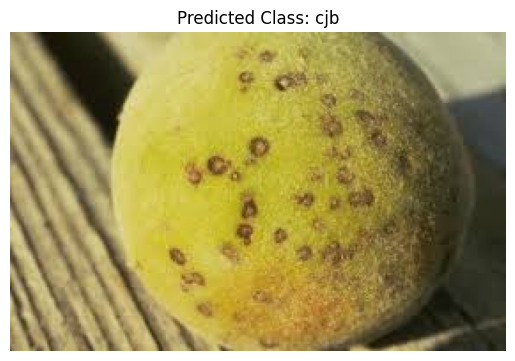

In [18]:
# Function to preprocess the image for prediction
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')  # Ensure image is in RGB format
    img = img.resize((224, 224))  # Resize to match the model's input size
    img = np.array(img) / 255.0  # Normalize the pixel values (0-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Preprocess the uploaded image
    preprocessed_img = preprocess_image(file_name)

    # Predict the class of the image
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.imshow(Image.open(file_name))
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}")
    plt.axis('off')
    plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
